In [1]:
# Step 1 - Load the data
import pandas as pd

# Load the vehicles dataset
vehicles = pd.read_csv('vehicles.csv')

# Display the first few rows of the dataset
print(vehicles.head())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

In [2]:
# Step 2 - Describe the data
print("Data Description:")
print(vehicles.describe())

# Show the data types of each column
print("\nData Types:")
print(vehicles.dtypes)

# Save the description to a file
vehicles.describe().to_csv('data_description.csv')

Data Description:
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

Data Types:
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      o

/var/folders/f3/xvhmb2c565b99fqd859163bw0000gn/T/ipykernel_75340/1099310779.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_filtered['price_thousands'] = vehicles_filtered['price'] / 1000
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/f3/xvhmb2c565b99fqd859163bw0000gn/T/ipykernel_75340/1099310779.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(vehicles_filtered['price_thousands'].min(), vehicles_filtered['price_thousands'].max())


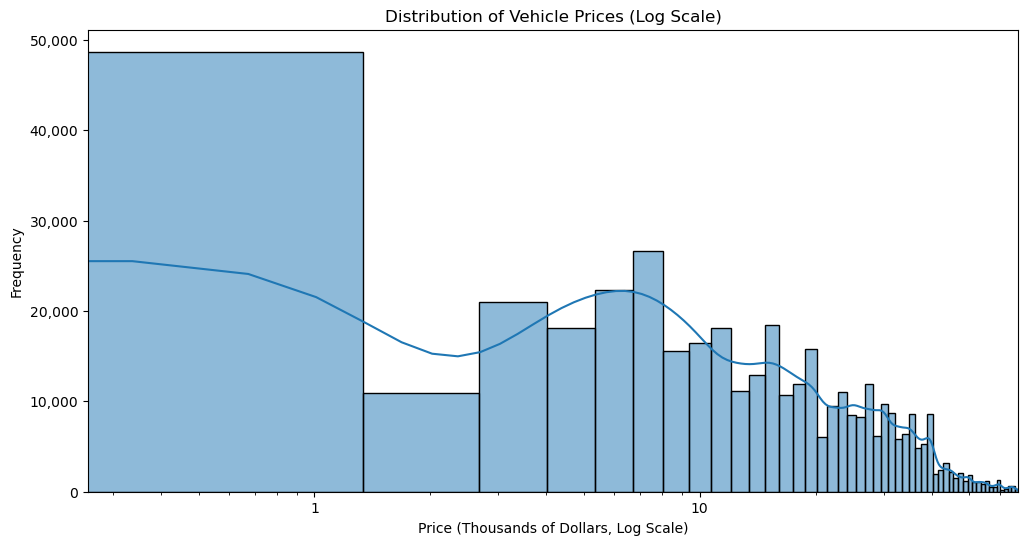

In [3]:
# Step 3 - Create a plot to give an initial exploration of the data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Removing outliers for better visualization (optional)
vehicles_filtered = vehicles[vehicles['price'] < vehicles['price'].quantile(0.99)]

# Convert price to thousands of dollars
vehicles_filtered['price_thousands'] = vehicles_filtered['price'] / 1000

# Plot the distribution of the vehicle prices using a logarithmic scale
plt.figure(figsize=(12, 6))
sns.histplot(vehicles_filtered['price_thousands'], bins=50, kde=True)
plt.xscale('log')
plt.xlim(vehicles_filtered['price_thousands'].min(), vehicles_filtered['price_thousands'].max())
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.title('Distribution of Vehicle Prices (Log Scale)')
plt.xlabel('Price (Thousands of Dollars, Log Scale)')
plt.ylabel('Frequency')
plt.savefig('price_distribution_log.png')
plt.show()

In [4]:
# Step 3B - determine how many values each of the categorical columns have
# before trying to generate a correlation matrix

# Identify categorical columns
categorical_columns = vehicles.select_dtypes(include=['object']).columns

# Count distinct values in each categorical column
print("Counting distinct values in each categorical column...")
distinct_counts = vehicles[categorical_columns].nunique()

# Print the results
print("\nDistinct Counts for Categorical Columns:")
for column, count in distinct_counts.items():
    print(f"{column}: {count}")

# Save the distinct counts to a CSV file
distinct_counts.to_csv('distinct_counts.csv', header=['Distinct Count'])

print("\nDistinct counts saved to 'distinct_counts.csv'")

Counting distinct values in each categorical column...

Distinct Counts for Categorical Columns:
region: 404
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51

Distinct counts saved to 'distinct_counts.csv'


Initial number of rows: 426880
Rows removed by removing top 1% price outliers: 4265
Rows removed where price is zero: 32895
Rows removed where odometer is missing: 2244
Rows removed where year is missing: 994
Rows removed where transmission is unknown 1496
Rows removed where manufacturer is unknown: 14546
Rows removed where fuel is unknown: 1888
Rows removed where title status is missing: 6530
Rows removed where model is missing: 4396
Set missing type values to 'unknown'
Removing rows where 'cylinders' equals 'other'...
Rows remaining after removal: 356897
Cleaning 'cylinders' values...
Rows remaining after removal: 356897
Converting 'cylinders' to numeric...
Rows remaining after cleaning and conversion: 211345
Filled missing paint color values with 'unknown'
Final number of rows: 211345

Missing Values:
id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition        53106
cylinders            0


/var/folders/f3/xvhmb2c565b99fqd859163bw0000gn/T/ipykernel_75340/2768470117.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  vehicles.fillna(method='ffill', inplace=True)


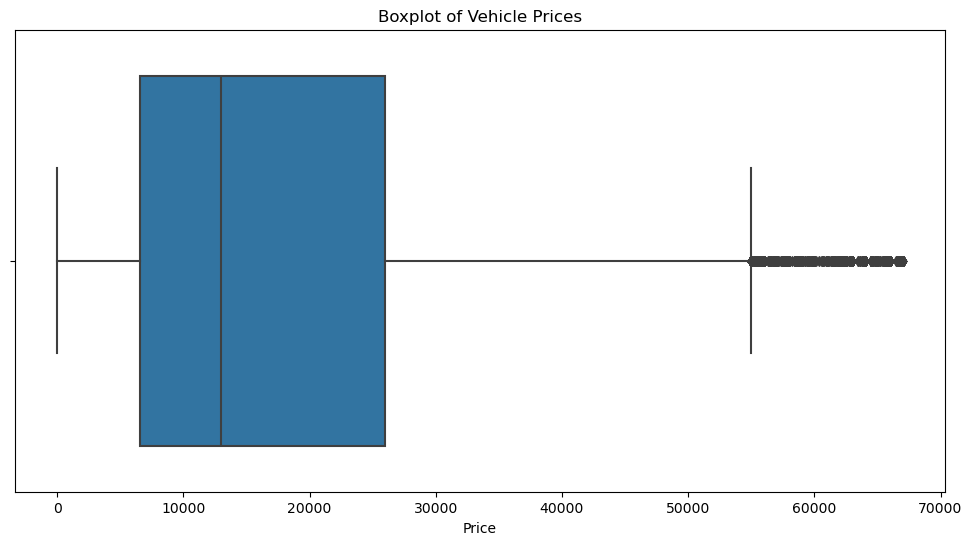

In [5]:
# Step 4 - Data quality clean the data and drop rows missing crucial information

initial_rows = len(vehicles)
print(f"Initial number of rows: {initial_rows}")

# Step 1: Remove outliers (top 1% of price)
Q99 = vehicles['price'].quantile(0.99)
vehicles = vehicles[vehicles['price'] <= Q99]
rows_after_outliers_removed = len(vehicles)
print(f"Rows removed by removing top 1% price outliers: {initial_rows - rows_after_outliers_removed}")
initial_rows = rows_after_outliers_removed

# Step 2: Remove all rows where the price is zero
vehicles = vehicles[vehicles['price'] != 0]
rows_after_price_zero_removed = len(vehicles)
print(f"Rows removed where price is zero: {initial_rows - rows_after_price_zero_removed}")
initial_rows = rows_after_price_zero_removed

# Step 3: Remove all rows where the odometer value is missing
vehicles = vehicles.dropna(subset=['odometer'])
rows_after_odometer_missing_removed = len(vehicles)
print(f"Rows removed where odometer is missing: {initial_rows - rows_after_odometer_missing_removed}")
initial_rows = rows_after_odometer_missing_removed

# Step 4: Remove all rows where the year is missing
vehicles = vehicles.dropna(subset=['year'])
rows_after_year_missing_removed = len(vehicles)
print(f"Rows removed where year is missing: {initial_rows - rows_after_year_missing_removed}")
initial_rows = rows_after_year_missing_removed

# Step 5: Remove all rows where the transmission is unknown
vehicles = vehicles[(vehicles['transmission'].notna())]
rows_after_transmission_unknown_removed = len(vehicles)
print(f"Rows removed where transmission is unknown {initial_rows - rows_after_transmission_unknown_removed}")
initial_rows = rows_after_transmission_unknown_removed

# Step 6: Remove all rows where the manufacturer is unknown
vehicles = vehicles[vehicles['manufacturer'].notna()]
rows_after_manufacturer_unknown_removed = len(vehicles)
print(f"Rows removed where manufacturer is unknown: {initial_rows - rows_after_manufacturer_unknown_removed}")
initial_rows = rows_after_manufacturer_unknown_removed

# Step 7: Remove all rows where the fuel is unknown
vehicles = vehicles[vehicles['fuel'].notna()]
rows_after_fuel_unknown_removed = len(vehicles)
print(f"Rows removed where fuel is unknown: {initial_rows - rows_after_fuel_unknown_removed}")
initial_rows = rows_after_fuel_unknown_removed

# Step 8: Remove all rows where the title status is unknown
vehicles = vehicles[vehicles['title_status'].notna()]
rows_after_title_status_missing_removed = len(vehicles)
print(f"Rows removed where title status is missing: {initial_rows - rows_after_title_status_missing_removed}")
initial_rows = rows_after_title_status_missing_removed

# Step 9: Remove all rows where the model is missing
vehicles = vehicles[vehicles['model'].notna()]
rows_after_model_missing_removed = len(vehicles)
print(f"Rows removed where model is missing: {initial_rows - rows_after_model_missing_removed}")
initial_rows = rows_after_model_missing_removed

# Step 11: Set the type to "unknown" where it is missing
vehicles['type'].fillna('unknown', inplace=True)
print("Set missing type values to 'unknown'")

# Step 12: Remove all rows where cylinders = 'other'
print("Removing rows where 'cylinders' equals 'other'...")
vehicles = vehicles[vehicles['cylinders'] != 'other'].copy()
print(f"Rows remaining after removal: {len(vehicles)}")

# Step 13: Remove the word 'cylinders' and any spaces from the values in the 'cylinders' column
print("Cleaning 'cylinders' values...")
vehicles['cylinders'] = vehicles['cylinders'].str.replace('cylinders', '').str.strip()
print(f"Rows remaining after removal: {len(vehicles)}")

# Step 14: Convert the string values in the 'cylinders' column to numbers
print("Converting 'cylinders' to numeric...")
vehicles['cylinders'] = pd.to_numeric(vehicles['cylinders'], errors='coerce')

# Step 15: Drop rows with NaN values that resulted from conversion errors
vehicles.dropna(subset=['cylinders'], inplace=True)
print(f"Rows remaining after cleaning and conversion: {len(vehicles)}")

# Step 16: Where there is no value for paint color set the value to "unknown"
vehicles['paint_color'].fillna('unknown', inplace=True)
print(f"Filled missing paint color values with 'unknown'")

# Final number of rows
final_rows = len(vehicles)
print(f"Final number of rows: {final_rows}")

# Check for missing values
missing_values = vehicles.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handle remaining missing values if any
vehicles.fillna(method='ffill', inplace=True)
print("\nMissing values handled using forward fill.")

# Check for outliers in the price column using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=vehicles['price'])
plt.title('Boxplot of Vehicle Prices')
plt.xlabel('Price')
plt.savefig('boxplot_price.png')
plt.show()

# Save the cleaned data to a CSV file
vehicles.to_csv('vehicles_cleaned.csv', index=False)

Loading the cleaned vehicles dataset...
Dataset loaded successfully.
Taking a random sample of 20% of the dataset...
Sample size: 42269
Removing outliers...
Filtered size: 41838
Converting price to thousands of dollars...
Conversion complete.
Performing one-hot encoding on categorical variables...
Encoded dataframe shape: (41838, 87)
Calculating correlation with price for each feature...

Correlation with Price (Thousands of Dollars) - Sorted:
transmission_other    0.395293
cylinders             0.332369
type_pickup           0.258558
type_truck            0.179219
manufacturer_ram      0.164772
                        ...   
manufacturer_honda   -0.128329
condition_fair       -0.131254
fuel_gas             -0.196802
type_sedan           -0.233099
drive_fwd            -0.308746
Name: price_thousands, Length: 86, dtype: float64
Writing the sorted correlations to 'price_correlations_sorted.csv'...
File 'price_correlations_sorted.csv' written successfully.
Plotting the correlation matrix.

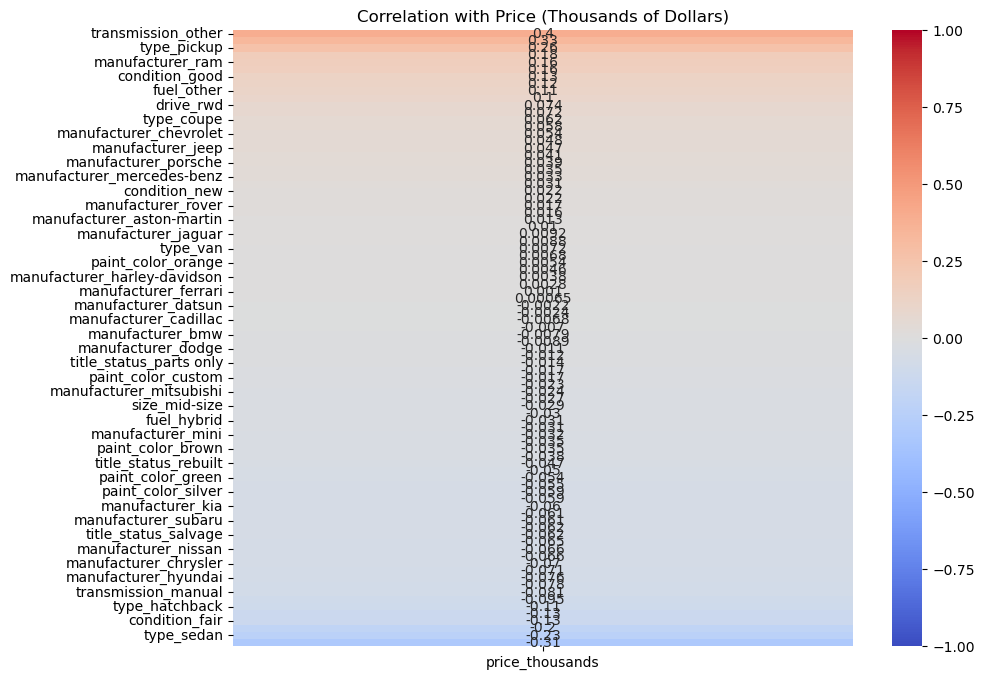

Correlation matrix plot saved as 'correlation_with_price.png'


In [6]:
# Step 5a - create a corelation plot 

# Load the cleaned dataset
print("Loading the cleaned vehicles dataset...")
vehicles = pd.read_csv('vehicles_cleaned.csv')
print("Dataset loaded successfully.")

# Take a random sample of the dataset (e.g., 20% of the data)
print("Taking a random sample of 20% of the dataset...")
vehicles_sample = vehicles.sample(frac=0.2, random_state=42)
print(f"Sample size: {len(vehicles_sample)}")

# Remove outliers for better visualization (optional)
print("Removing outliers...")
vehicles_filtered = vehicles_sample[vehicles_sample['price'] < vehicles_sample['price'].quantile(0.99)].copy()
print(f"Filtered size: {len(vehicles_filtered)}")

# Convert price to thousands of dollars for consistency
print("Converting price to thousands of dollars...")
vehicles_filtered.loc[:, 'price_thousands'] = vehicles_filtered['price'] / 1000
print("Conversion complete.")

# Select the relevant categorical columns
categorical_columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Perform one-hot encoding on categorical variables
print("Performing one-hot encoding on categorical variables...")
vehicles_encoded = pd.get_dummies(vehicles_filtered[categorical_columns + ['price_thousands']], drop_first=True)
print(f"Encoded dataframe shape: {vehicles_encoded.shape}")

# Calculate correlation with price for each feature
print("Calculating correlation with price for each feature...")
correlation_matrix = vehicles_encoded.corr()

# Extract the correlations with 'price_thousands'
price_correlations = correlation_matrix['price_thousands'].drop('price_thousands')

# Sort the correlation values in descending order
price_correlations_sorted = price_correlations.sort_values(ascending=False)

# Print the correlation values to the screen
print("\nCorrelation with Price (Thousands of Dollars) - Sorted:")
print(price_correlations_sorted)

# Write the correlation values to a file
print("Writing the sorted correlations to 'price_correlations_sorted.csv'...")
price_correlations_sorted.to_csv('price_correlations_sorted.csv')
print("File 'price_correlations_sorted.csv' written successfully.")

# Plot the correlation matrix
print("Plotting the correlation matrix...")
plt.figure(figsize=(10, 8))
sns.heatmap(price_correlations_sorted.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Price (Thousands of Dollars)')
plt.savefig('correlation_with_price.png')
plt.show()
print("Correlation matrix plot saved as 'correlation_with_price.png'")

Correlation Matrix:
             price  odometer      year
price     1.000000 -0.202513  0.385133
odometer -0.202513  1.000000 -0.183679
year      0.385133 -0.183679  1.000000


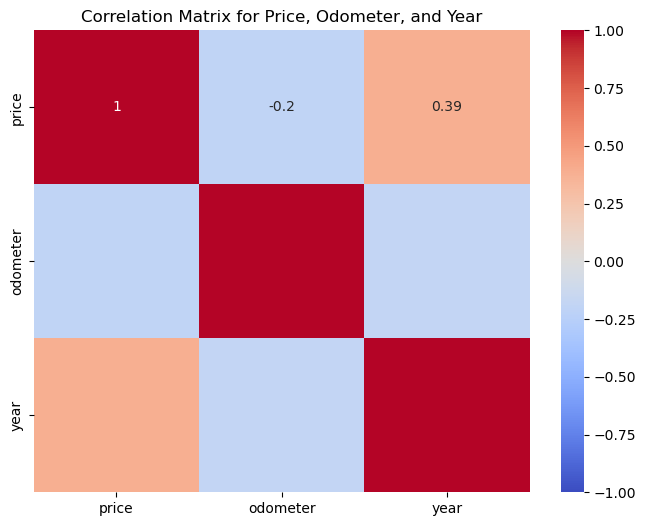

Correlation matrix plot saved as 'correlation_matrix_price_odometer_year.png'


In [7]:
# Step 5b - show the correlation of the numeric attributes

# Select the relevant columns for correlation analysis
numeric_columns = ['price', 'odometer', 'year']

# Calculate the correlation matrix
correlation_matrix = vehicles_filtered[numeric_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Price, Odometer, and Year')
plt.savefig('correlation_matrix_price_odometer_year.png')
plt.show()
print("Correlation matrix plot saved as 'correlation_matrix_price_odometer_year.png'")

Loading dataset...
Dataset loaded successfully.
Preparing data for analysis...
Data preparation completed.
Handling categorical data with category codes...
Categorical data encoding completed.
Performing Truncated SVD...
Truncated SVD completed.


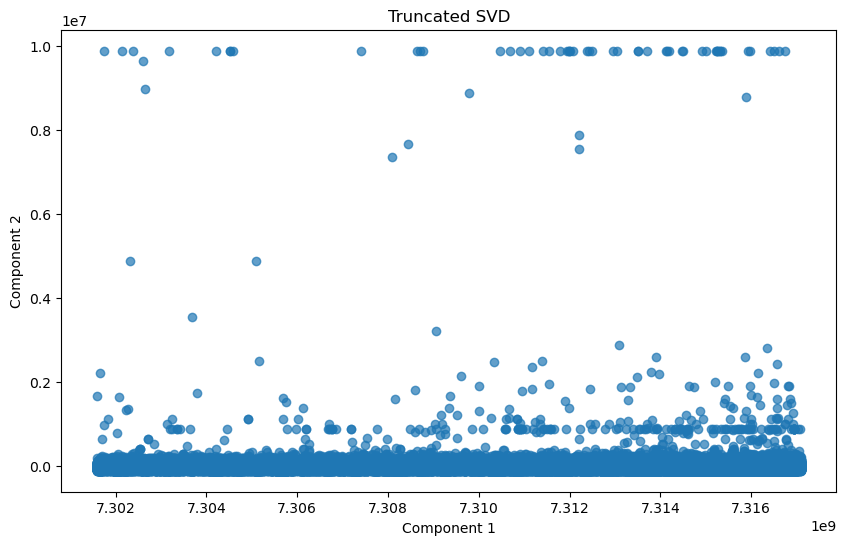

Truncated SVD plot saved as 'svd_plot.png'.
Performing K-Means Clustering...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clustering completed.


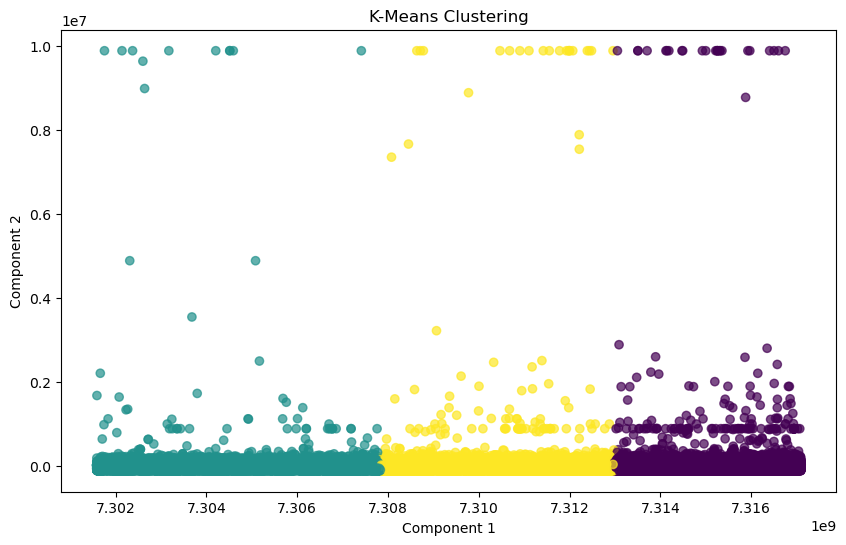

K-Means Clustering plot saved as 'kmeans_plot.png'.
Performing PCA...
PCA completed.


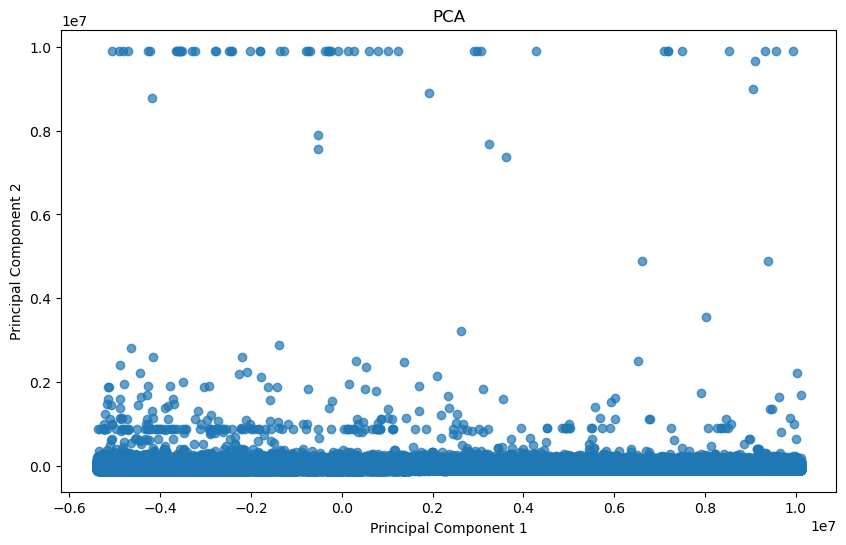

PCA plot saved as 'pca_plot.png'.
Performing Simple Linear Regression...
Simple Linear Regression completed.


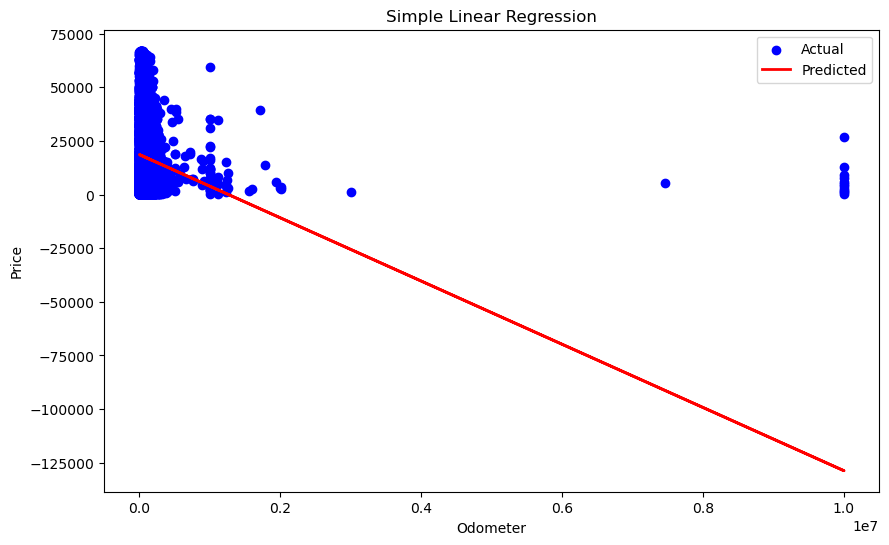

Simple Linear Regression plot saved as 'simple_linear_regression_plot.png'.
Performing Multiple Linear Regression...
Multiple Linear Regression completed.


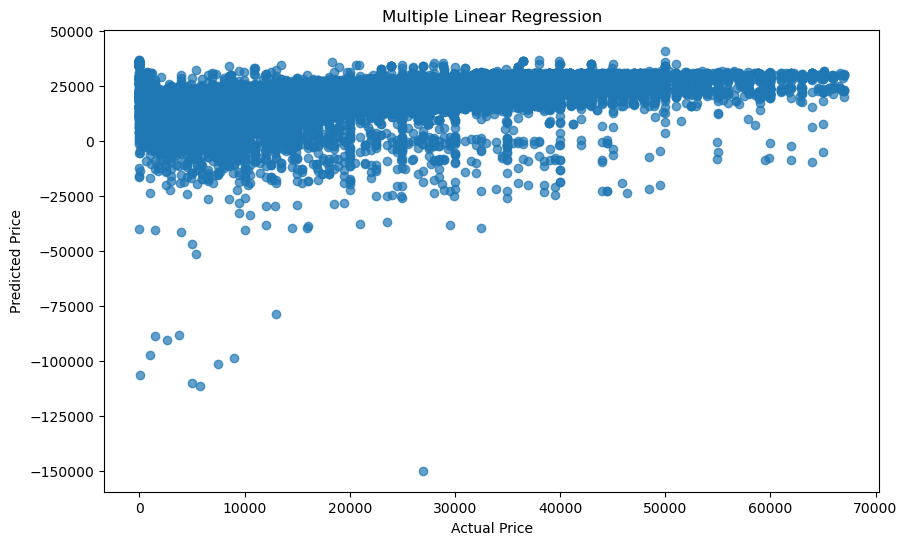

Multiple Linear Regression plot saved as 'multiple_linear_regression_plot.png'.
Simple Linear Regression RMSE: 12877.72025454713
Multiple Linear Regression RMSE: 10764.930126003925


In [8]:
# Step 6 - Initial Modeling and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the cleaned dataset
print("Loading dataset...")
vehicles = pd.read_csv('vehicles_cleaned.csv')
print("Dataset loaded successfully.")

# Prepare the data for analysis
print("Preparing data for analysis...")
features = ['year', 'odometer', 'cylinders']
X = vehicles[features]
y = vehicles['price']
print("Data preparation completed.")

# Handle categorical data with category codes for memory efficiency
print("Handling categorical data with category codes...")
categorical_columns = vehicles.select_dtypes(include=['object']).columns

for column in categorical_columns:
    vehicles[column] = vehicles[column].astype('category').cat.codes

print("Categorical data encoding completed.")

# Truncated SVD
print("Performing Truncated SVD...")
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(vehicles)
print("Truncated SVD completed.")
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.7)
plt.title('Truncated SVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('svd_plot.png')
plt.show()
print("Truncated SVD plot saved as 'svd_plot.png'.")

# K-Means Clustering
print("Performing K-Means Clustering...")
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(vehicles)
print("K-Means Clustering completed.")
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('kmeans_plot.png')
plt.show()
print("K-Means Clustering plot saved as 'kmeans_plot.png'.")

# PCA
print("Performing PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(vehicles)
print("PCA completed.")
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pca_plot.png')
plt.show()
print("PCA plot saved as 'pca_plot.png'.")

# Simple Linear Regression
print("Performing Simple Linear Regression...")
X_simple = vehicles[['odometer']]
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = model_simple.predict(X_test_simple)
print("Simple Linear Regression completed.")

plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.legend()
plt.savefig('simple_linear_regression_plot.png')
plt.show()
print("Simple Linear Regression plot saved as 'simple_linear_regression_plot.png'.")

# Multiple Linear Regression
print("Performing Multiple Linear Regression...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)
print("Multiple Linear Regression completed.")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, alpha=0.7)
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.savefig('multiple_linear_regression_plot.png')
plt.show()
print("Multiple Linear Regression plot saved as 'multiple_linear_regression_plot.png'.")

# Evaluate the models
simple_rmse = np.sqrt(mean_squared_error(y_test_simple, y_pred_simple))
multiple_rmse = np.sqrt(mean_squared_error(y_test, y_pred_multiple))

print(f"Simple Linear Regression RMSE: {simple_rmse}")
print(f"Multiple Linear Regression RMSE: {multiple_rmse}")


Loading the cleaned vehicles dataset...
Dataset loaded successfully.
Selecting relevant features and the target variable...
Features and target variable selected.
Standardizing the features...
Features standardized.
Splitting the data into training and testing sets...
Data split into training and testing sets. Training set size: 147941, Testing set size: 63404
Applying PCA for dimensionality reduction...
PCA applied.
Performing Sequential Feature Selection...
Sequential Feature Selection completed.
Performing hyperparameter tuning for Ridge and Lasso regressions...
Training Ridge Regression...
Ridge Regression training completed.
Training Lasso Regression...
Lasso Regression training completed.
Evaluating Ridge Regression...
Ridge Regression - Mean Absolute Error (MAE): 7692.862739671443
Ridge Regression - Mean Squared Error (MSE): 105790776.00500008
Ridge Regression - Root Mean Squared Error (RMSE): 10285.464306729185
Ridge Regression - R-squared (R2): 0.3855023200832426
Evaluating La

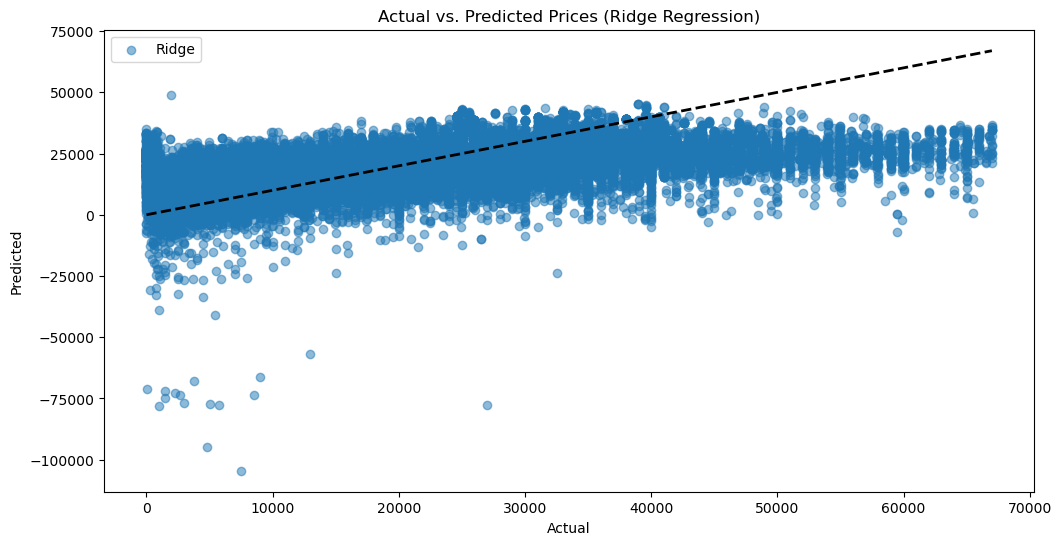

Plotting actual vs. predicted prices for Lasso Regression...


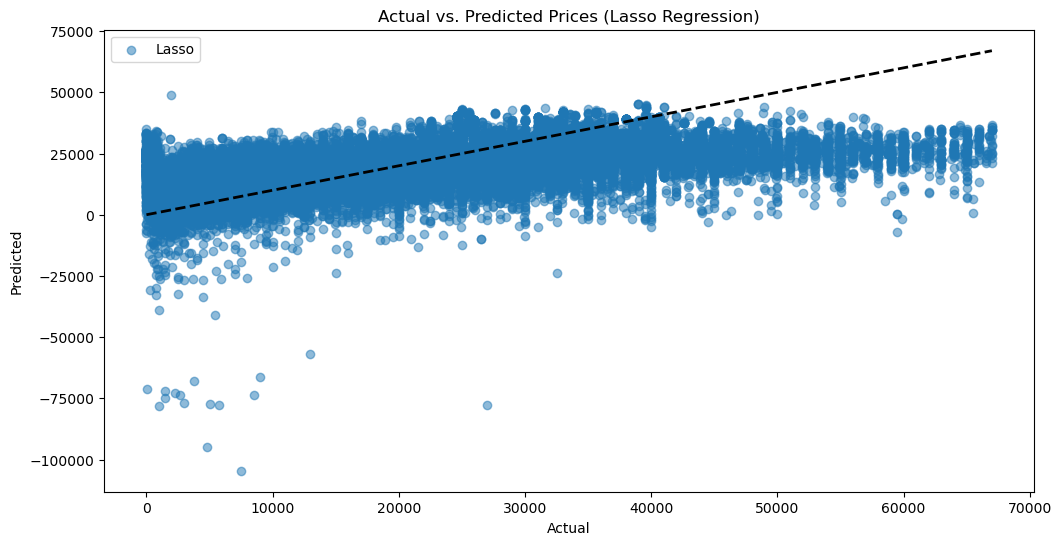

Plotting actual vs. predicted prices for Random Forest Regressor...


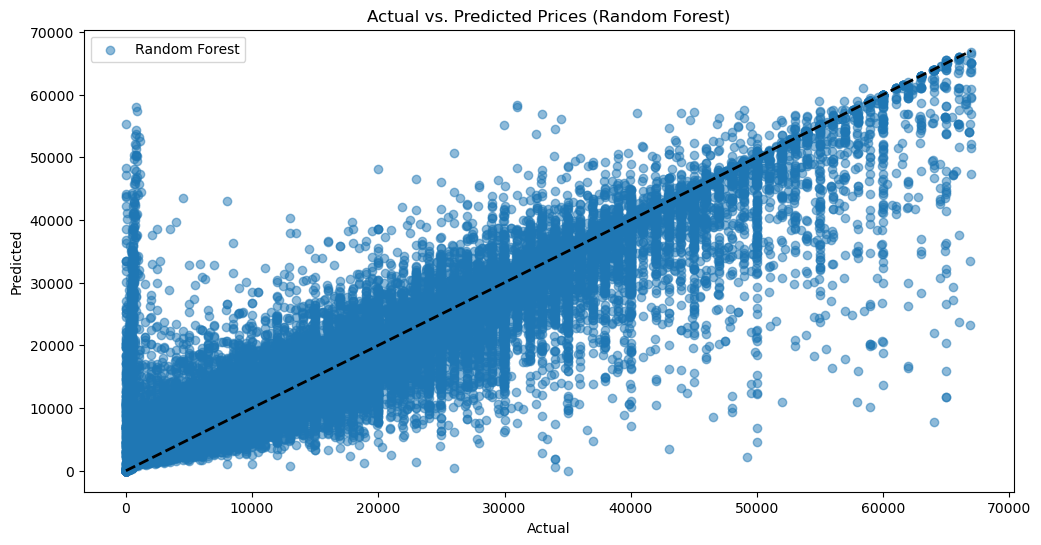

All processes completed successfully.


In [9]:
# Step 7 - Advanced Modeling and analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the cleaned dataset
print("Loading the cleaned vehicles dataset...")
vehicles = pd.read_csv('vehicles_cleaned.csv')
print("Dataset loaded successfully.")

# Select relevant features and the target variable
print("Selecting relevant features and the target variable...")
features = ['year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
X = pd.get_dummies(vehicles[features], drop_first=True)
y = vehicles['price']
print("Features and target variable selected.")

# Standardize the features
print("Standardizing the features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features standardized.")

# Split the data into training and testing sets
print("Splitting the data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f"Data split into training and testing sets. Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

# Apply PCA
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("PCA applied.")

# Sequential Feature Selection
print("Performing Sequential Feature Selection...")
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward')
sfs.fit(X_train_pca, y_train)
X_train_sfs = sfs.transform(X_train_pca)
X_test_sfs = sfs.transform(X_test_pca)
print("Sequential Feature Selection completed.")

# Hyperparameter tuning for Ridge and Lasso
print("Performing hyperparameter tuning for Ridge and Lasso regressions...")
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = GridSearchCV(Ridge(), param_grid, cv=5)
lasso = GridSearchCV(Lasso(), param_grid, cv=5)

# Train Ridge Regression
print("Training Ridge Regression...")
ridge.fit(X_train_sfs, y_train)
y_pred_ridge = ridge.predict(X_test_sfs)
print("Ridge Regression training completed.")

# Train Lasso Regression
print("Training Lasso Regression...")
lasso.fit(X_train_sfs, y_train)
y_pred_lasso = lasso.predict(X_test_sfs)
print("Lasso Regression training completed.")

# Evaluate Ridge Regression
print("Evaluating Ridge Regression...")
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Absolute Error (MAE): {mae_ridge}')
print(f'Ridge Regression - Mean Squared Error (MSE): {mse_ridge}')
print(f'Ridge Regression - Root Mean Squared Error (RMSE): {rmse_ridge}')
print(f'Ridge Regression - R-squared (R2): {r2_ridge}')

# Evaluate Lasso Regression
print("Evaluating Lasso Regression...")
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Absolute Error (MAE): {mae_lasso}')
print(f'Lasso Regression - Mean Squared Error (MSE): {mse_lasso}')
print(f'Lasso Regression - Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'Lasso Regression - R-squared (R2): {r2_lasso}')

# Train Random Forest Regressor
print("Training Random Forest Regressor...")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Regressor training completed.")

# Evaluate Random Forest Regressor
print("Evaluating Random Forest Regressor...")
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Random Forest - R-squared (R2): {r2_rf}')

# Plot the actual vs. predicted prices for Ridge Regression
print("Plotting actual vs. predicted prices for Ridge Regression...")
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices (Ridge Regression)')
plt.legend()
plt.savefig('actual_vs_predicted_prices_ridge.png')
plt.show()

# Plot the actual vs. predicted prices for Lasso Regression
print("Plotting actual vs. predicted prices for Lasso Regression...")
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices (Lasso Regression)')
plt.legend()
plt.savefig('actual_vs_predicted_prices_lasso.png')
plt.show()

# Plot the actual vs. predicted prices for Random Forest Regressor
print("Plotting actual vs. predicted prices for Random Forest Regressor...")
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.legend()
plt.savefig('actual_vs_predicted_prices_rf.png')
plt.show()

print("All processes completed successfully.")

In [ ]:
# Step 8 - also including Gradient Boosting, SVR and hyperparameter tuning

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

# Load the cleaned dataset
print("Loading the cleaned vehicles dataset...")
vehicles = pd.read_csv('vehicles_cleaned.csv')
print("Dataset loaded successfully.")

# Select relevant features and the target variable
print("Selecting relevant features and the target variable...")
features = ['year', 'odometer', 'cylinders', 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
X = pd.get_dummies(vehicles[features], drop_first=True)
y = vehicles['price']
print("Features and target variable selected.")

# Standardize the features
print("Standardizing the features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features standardized.")

# Use a smaller sample for testing
print("Using a smaller sample for testing...")
X_sample, _, y_sample, _ = train_test_split(X_scaled, y, train_size=0.1, random_state=42)
print(f"Sample size: {len(X_sample)}")

# Split the data into training and testing sets
print("Splitting the data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)
print(f"Data split into training and testing sets. Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

# Apply PCA
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("PCA applied.")

# Sequential Feature Selection
print("Performing Sequential Feature Selection...")
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward')
sfs.fit(X_train_pca, y_train)
X_train_sfs = sfs.transform(X_train_pca)
X_test_sfs = sfs.transform(X_test_pca)
selected_features = sfs.get_support(indices=True)
print("Sequential Feature Selection completed.")
print(f"Selected features indices: {selected_features}")

# Hyperparameter tuning for Ridge and Lasso
print("Performing hyperparameter tuning for Ridge and Lasso regressions...")
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = GridSearchCV(Ridge(), param_grid, cv=3)
lasso = GridSearchCV(Lasso(), param_grid, cv=3)

# Train Ridge Regression
print("Training Ridge Regression...")
ridge.fit(X_train_sfs, y_train)
y_pred_ridge = ridge.predict(X_test_sfs)
print("Ridge Regression training completed.")

# Train Lasso Regression
print("Training Lasso Regression...")
lasso.fit(X_train_sfs, y_train)
y_pred_lasso = lasso.predict(X_test_sfs)
print("Lasso Regression training completed.")

# Train Gradient Boosting Regressor using a smaller grid
print("Training Gradient Boosting Regressor...")
gbr = GradientBoostingRegressor()
param_grid_gbr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}
gbr_grid = GridSearchCV(gbr, param_grid_gbr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
y_pred_gbr = gbr_grid.best_estimator_.predict(X_test)
print("Gradient Boosting Regressor training completed.")

# Train Support Vector Regression
print("Training Support Vector Regression...")
svr = SVR()
param_grid_svr = {
    'kernel': ['rbf'],
    'C': [1, 10],
    'gamma': [0.01, 0.1]
}
svr_grid = GridSearchCV(svr, param_grid_svr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid.fit(X_train, y_train)
y_pred_svr = svr_grid.best_estimator_.predict(X_test)
print("Support Vector Regression training completed.")

# Train Random Forest Regressor
print("Training Random Forest Regressor...")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Regressor training completed.")

# Evaluate Ridge Regression
print("Evaluating Ridge Regression...")
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Absolute Error (MAE): {mae_ridge}')
print(f'Ridge Regression - Mean Squared Error (MSE): {mse_ridge}')
print(f'Ridge Regression - Root Mean Squared Error (RMSE): {rmse_ridge}')
print(f'Ridge Regression - R-squared (R2): {r2_ridge}')

# Evaluate Lasso Regression
print("Evaluating Lasso Regression...")
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - Mean Absolute Error (MAE): {mae_lasso}')
print(f'Lasso Regression - Mean Squared Error (MSE): {mse_lasso}')
print(f'Lasso Regression - Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'Lasso Regression - R-squared (R2): {r2_lasso}')

# Evaluate Gradient Boosting Regressor
print("Evaluating Gradient Boosting Regressor...")
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f'Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae_gbr}')
print(f'Gradient Boosting Regressor - Mean Squared Error (MSE): {mse_gbr}')
print(f'Gradient Boosting Regressor - Root Mean Squared Error (RMSE): {rmse_gbr}')
print(f'Gradient Boosting Regressor - R-squared (R2): {r2_gbr}')

# Evaluate Support Vector Regression
print("Evaluating Support Vector Regression...")
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Regression - Mean Absolute Error (MAE): {mae_svr}')
print(f'Support Vector Regression - Mean Squared Error (MSE): {mse_svr}')
print(f'Support Vector Regression - Root Mean Squared Error (RMSE): {rmse_svr}')
print(f'Support Vector Regression - R-squared (R2): {r2_svr}')

# Evaluate Random Forest Regressor
print("Evaluating Random Forest Regressor...")
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Random Forest - R-squared (R2): {r2_rf}')

# Plot the actual vs. predicted prices for Ridge Regression
print("Plotting actual vs. predicted prices for Ridge Regression...")
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices (Ridge Regression)')
plt.legend()
plt.savefig('actual_vs_predicted_prices_ridge.png')
plt.show()

# Plot the actual vs. predicted prices for Lasso Regression
print("Plotting actual vs. predicted prices for Lasso Regression...")
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices (Lasso Regression)')
plt.legend()
plt.savefig('actual_vs_predicted_prices_lasso.png')
plt.show()

# Plot the actual vs. predicted prices for Random Forest Regressor
print("Plotting actual vs. predicted prices for Random Forest Regressor...")
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.legend()
plt.savefig('actual_vs_predicted_prices_rf.png')
plt.show()

# Plot the actual vs. predicted prices for Support Vector Regression
print("Plotting actual vs. predicted prices for Support Vector Regression...")
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, label='SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices (Support Vector Regression)')
plt.legend()
plt.savefig('actual_vs_predicted_prices_svr.png')
plt.show()

# Plot the actual vs. predicted prices for Gradient Boosting Regression
print("Plotting actual vs. predicted prices for Gradient Boosting Regression...")
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices (Gradient Boosting Regression)')
plt.legend()
plt.savefig('actual_vs_predicted_prices_gbr.png')
plt.show()

